# GOLD PRICE PREDICTION

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
path = 'C:\\Users\\raj gupta\\Downloads\\gld_price_data.csv'
df = pd.read_csv(path)
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


df.isnull().sum()

In [8]:
df.shape

(2290, 6)

In [9]:
#correlation 
#getting relation bw various attributes 

In [10]:
correlation = df.corr()


<AxesSubplot:>

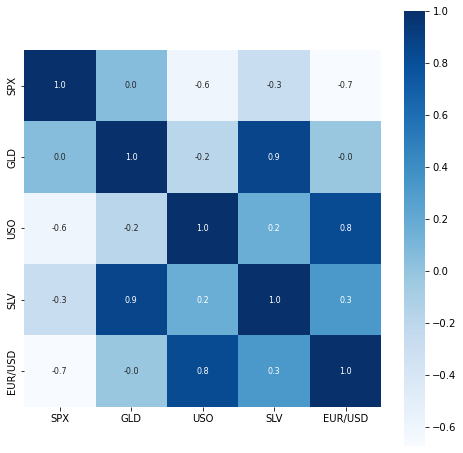

In [16]:
plt.figure(figsize =(8,8))
sns.heatmap(correlation ,cbar = True , square = True , annot = True ,fmt ='.1f',annot_kws = {'size':8},cmap = 'Blues' )
        


In [17]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

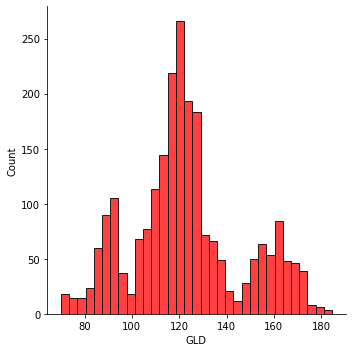

In [19]:
sns.displot(df['GLD'] , color = 'r')

In [21]:
x =df.drop(columns = ['GLD' ,'Date'])
y = df['GLD']
y.shape , x.shape

((2290,), (2290, 4))

In [22]:
from sklearn.model_selection import train_test_split

In [29]:

x_train , x_test,y_train ,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)
x_train.shape ,x_test.shape , y_train.shape , y_test.shape

((1832, 4), (458, 4), (1832,), (458,))

# ML MODEL TRAINING 

In [32]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn import metrics

In [31]:
regressor = RandomForestRegressor()
regressor.fit(x_train , y_train)
regressor.score(x_test , y_test)

0.9893908262422958

In [34]:
# R squared error
test_data_prediction = regressor.predict(x_test)
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9893908262422958


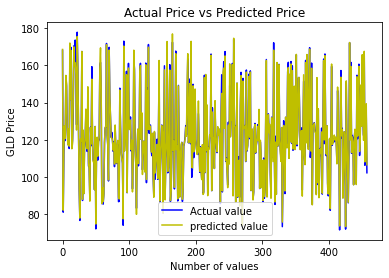

In [37]:
y_test = list(y_test)
plt.plot(y_test ,color ='b',label ='Actual value')
plt.plot(test_data_prediction,color = 'y' ,label ='predicted value' )

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()